<a href="https://colab.research.google.com/github/raghavendrakulkarni14/AlmaBetterCAP2/blob/main/RaghavendraAKulkarni_Regression_cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## ***Importing the basic libraries for reading,visualizing the dataset***

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
#mounting drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the dataset
df=pd.read_csv("/content/drive/MyDrive/ALMABETTER_CAPSTONE_2/SeoulBikeData.csv",encoding= 'unicode_escape')


In [4]:
#Having a look at the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## ***Getting the info of dataset i.e. the datatypes of each variables***

In [5]:
#geting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## ***Checking for null values***
## ***As we can see there are no null values in the dataset***

In [6]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## ***Looking at correlation between variables***

In [7]:
#Looking at the correlation between variables
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# ***Visualizing the dataset using pairplots***

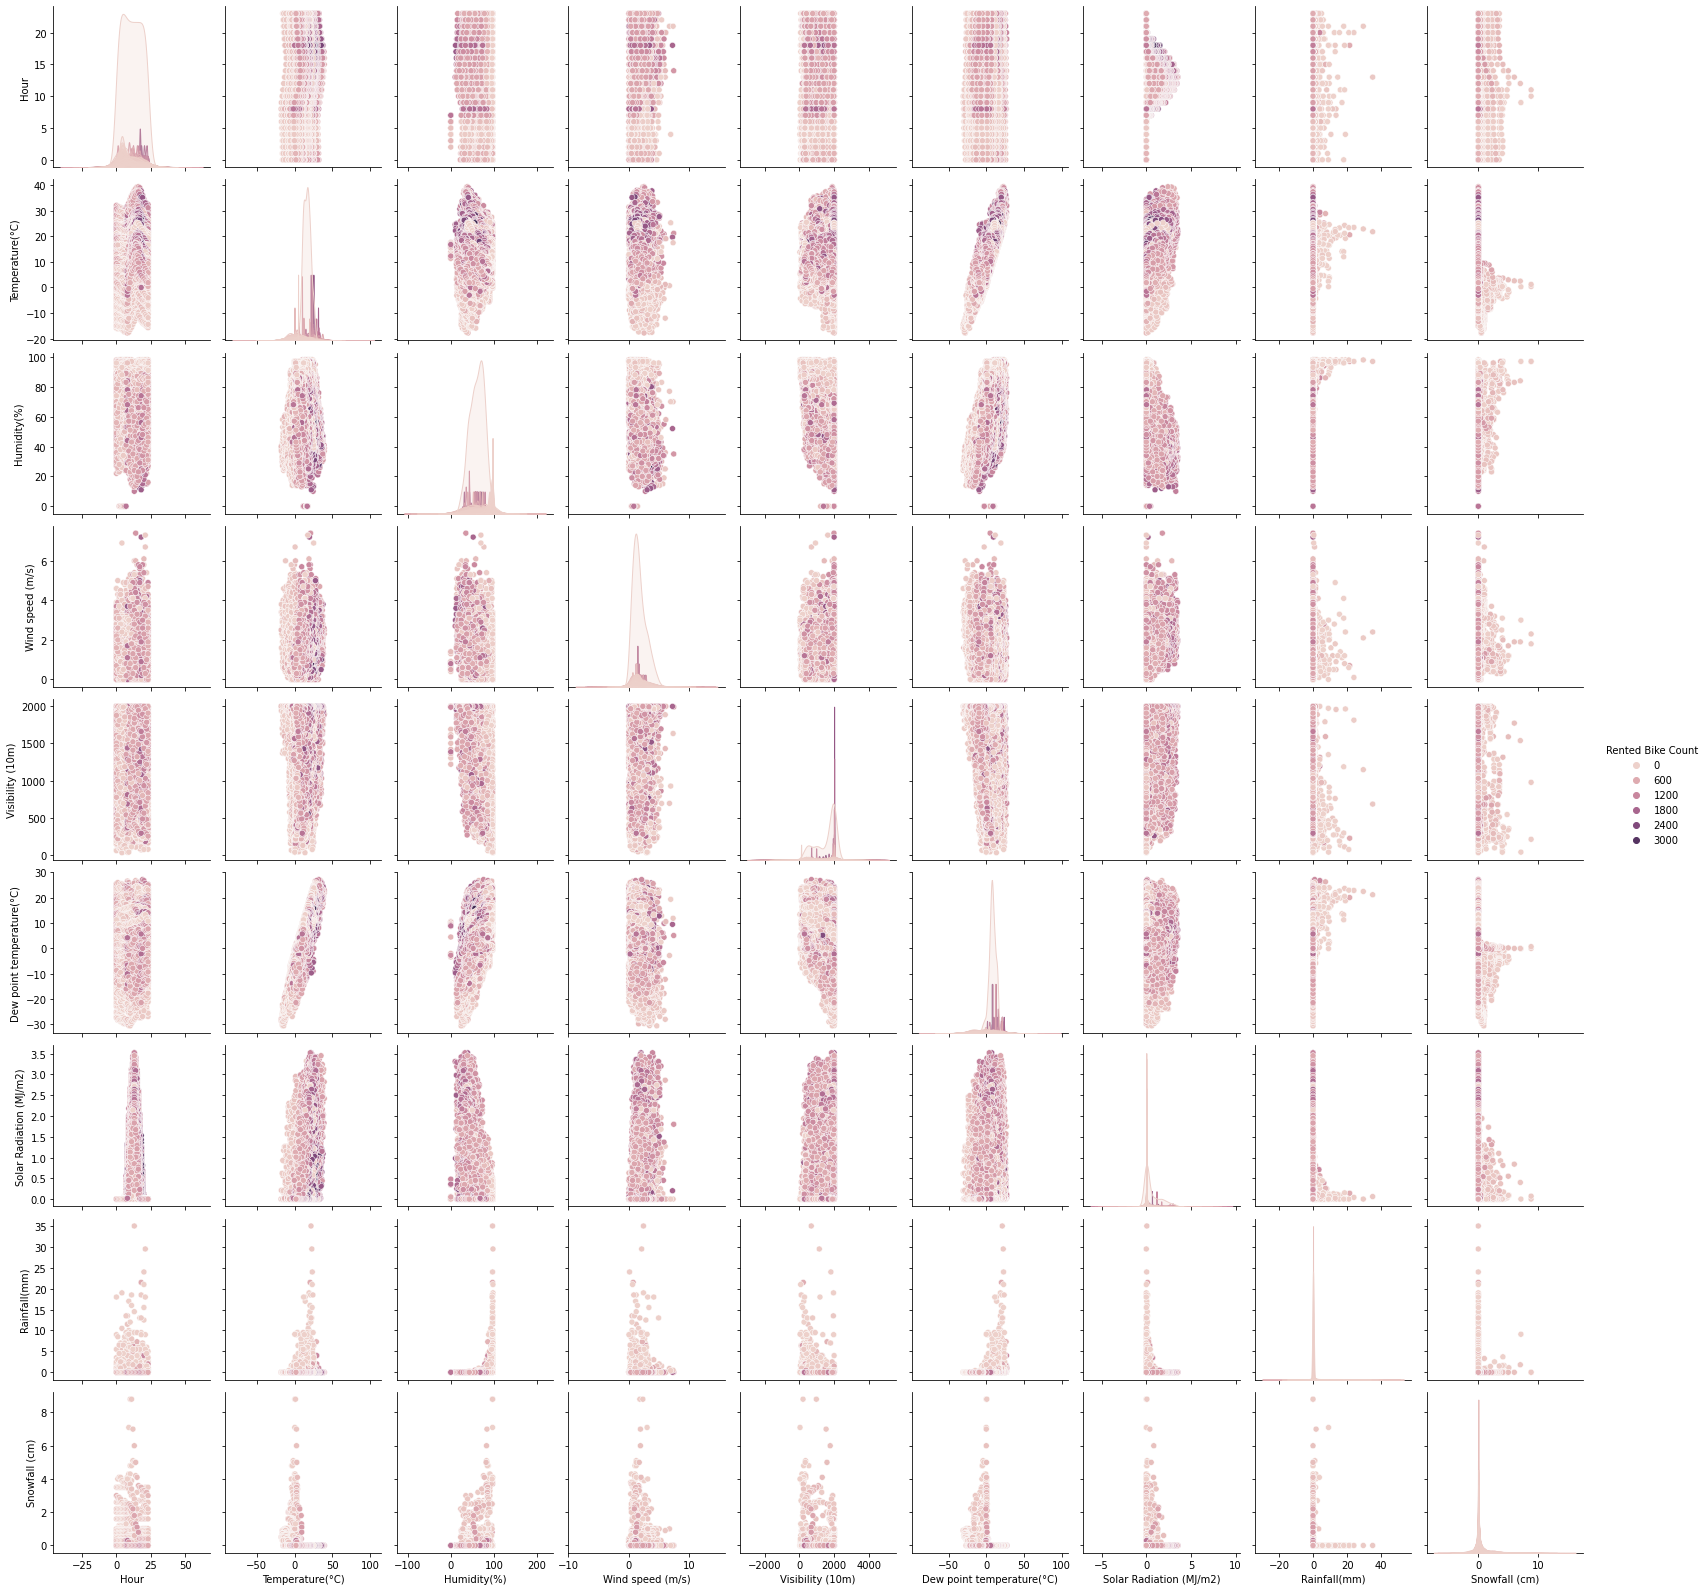

In [8]:
#pairplots
sns.pairplot(df,hue='Rented Bike Count')

In [9]:
col=['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

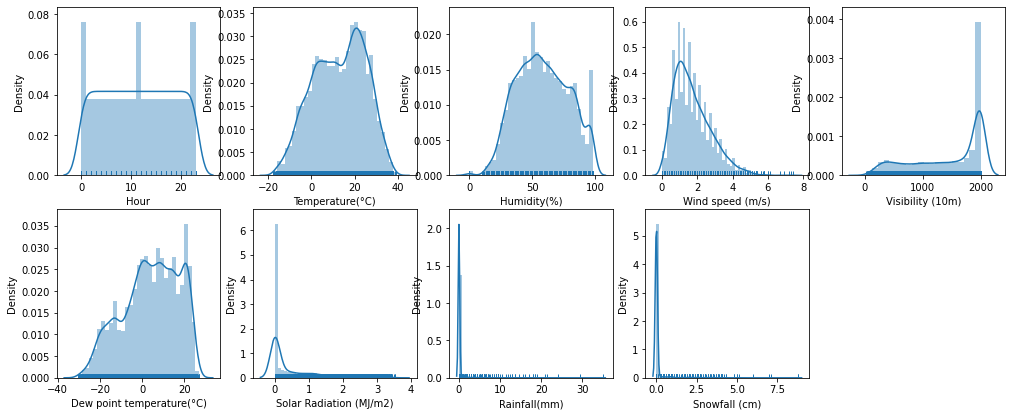

In [10]:
#distplots
fig = plt.figure(figsize=(17, 18))
for i in range(len(col)):
  plt.subplot(5,5,i+1)
  sns.distplot(df[col[i]], hist=True, rug=True)

In [11]:
#appending the dependent variable at last for convineance
column=df['Rented Bike Count']
df.drop('Rented Bike Count',1,inplace=True)
df['Rented Bike Count']=column

In [12]:
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [13]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Hour').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),RBC
0,0,4119.5,23724,530.6,523184,1658.2,0.0,53.0,22.5,197633
1,1,3987.0,24137,468.7,516407,1631.9,0.0,22.7,26.9,155557
2,2,3865.9,24567,446.7,504648,1620.2,0.0,35.4,27.9,110095
3,3,3757.2,24870,437.1,495902,1607.0,0.0,53.6,28.0,74216
4,4,3659.6,25087,444.3,488839,1572.5,0.0,56.8,27.9,48396


## ***The probability of renting a bike is high during evenings than in the mornings as we can look at the count is having peak at hour 18***

Text(0, 0.5, 'Rented Bike Count')

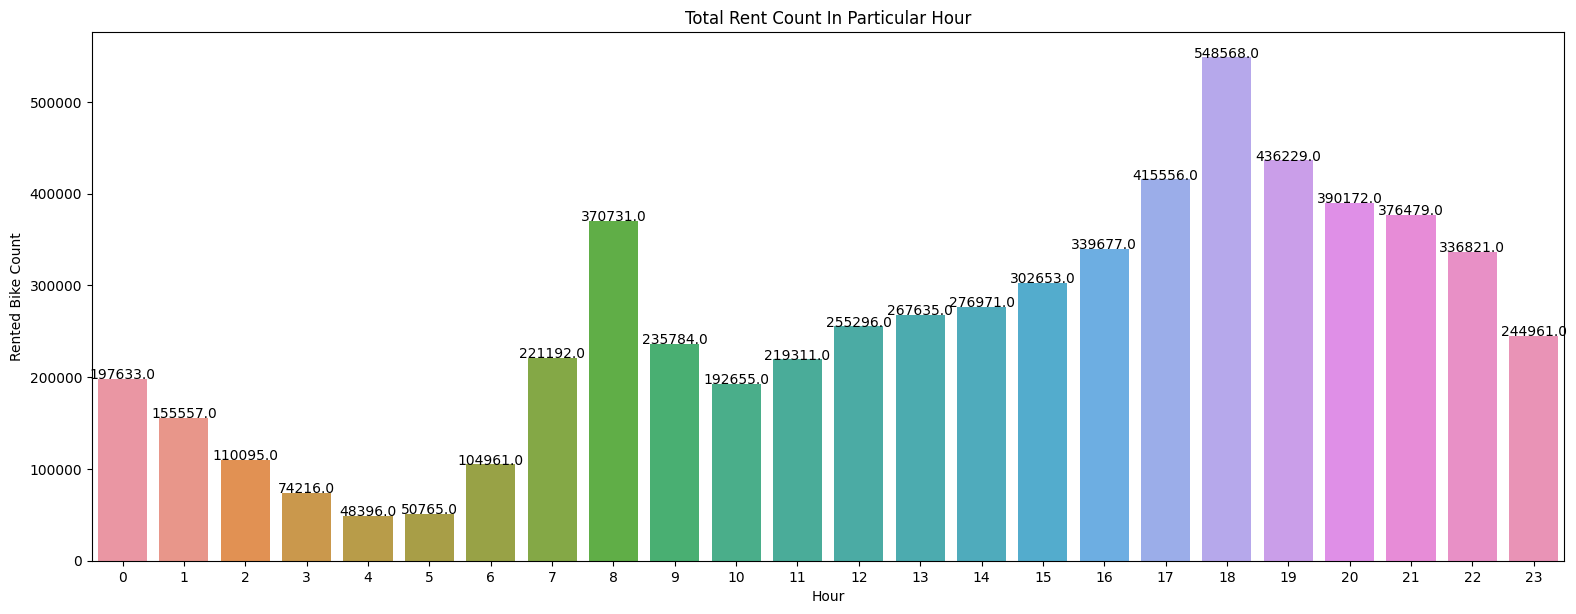

In [14]:
#generating bar plot
plt.figure(figsize=(19,7),dpi=100)
g=sns.barplot(x="Hour", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Total Rent Count In Particular Hour")    
plt.ylabel('Rented Bike Count')

# ***The data in dataset are equally distributed among seasons making the dataset a balanced dataset***

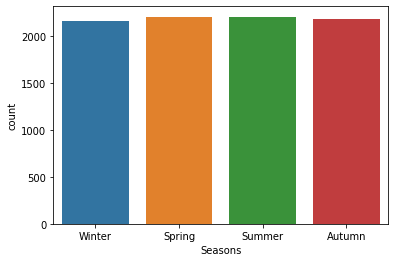

In [15]:
#bar plot
sns.countplot(x='Seasons',data=df)

In [16]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Seasons').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()


,Seasons,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),RBC
0,Autumn,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,1790002
1,Spring,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,1611909
2,Summer,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,2283234
3,Winter,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,487169


# ***Summer season has the highest bike counts among all other seasons and winter has the least count of rented bikes***

Text(0, 0.5, 'Rented Bike Count')

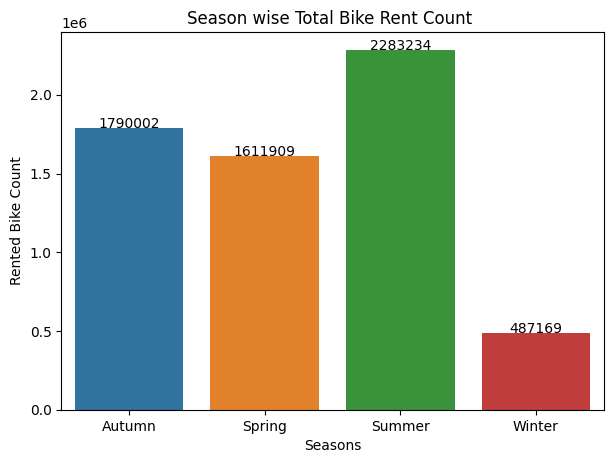

In [17]:
plt.figure(figsize=(7,5),dpi=100)
g=sns.barplot(x="Seasons", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Season wise Total Bike Rent Count ")    
plt.ylabel('Rented Bike Count')

## ***The bikes are been rented on non holidays than on holidays***

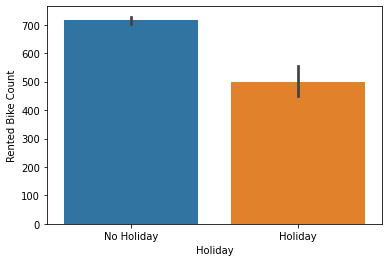

In [18]:
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

## ***The bikes are rented only on Functioning days***

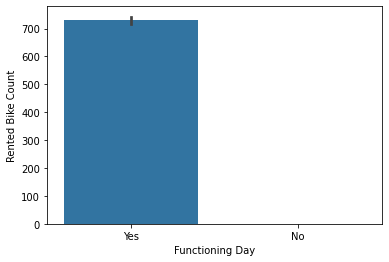

In [19]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

## ***Converting the Date variable in datatime datatype as to get more insights***

In [20]:
# using datetime library to extract the year, month, day data
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254,2017,1,12
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204,2017,1,12
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173,2017,1,12
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107,2017,1,12
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78,2017,1,12


## ***There is linear growth in the rental bike count***

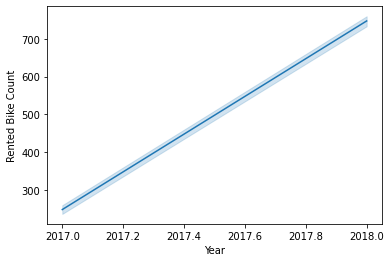

In [21]:
#line graph
sns.lineplot(x="Year", y="Rented Bike Count", data=df)

# ***The bike count is very good between May and August***
# ***Also sudden hike in the month of October***

Text(0, 0.5, 'Rented Bike Count')

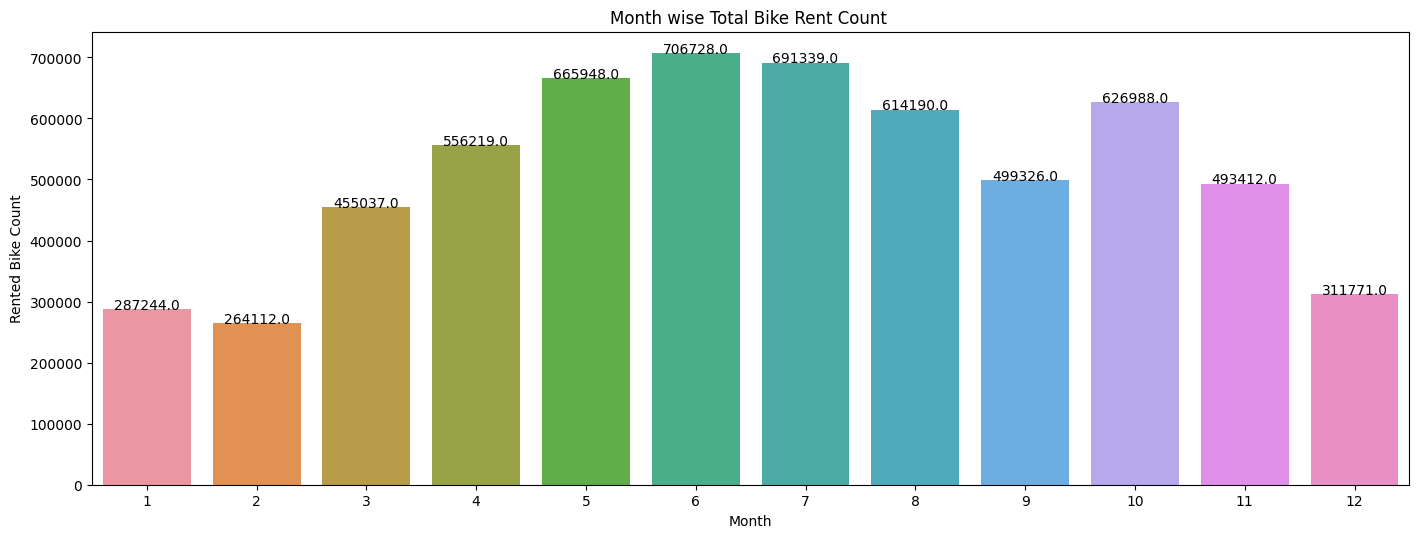

In [22]:
#grouping required variables for visualization purpose
groupedvalues = df.groupby('Month').sum().reset_index()
groupedvalues.rename(columns={'Rented Bike Count':'RBC'},inplace=True)
groupedvalues.head()


plt.figure(figsize=(17,6),dpi=100)
g=sns.barplot(x="Month", y="RBC", data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.RBC,round(row.RBC,1),color='black', ha="center")
plt.title("Month wise Total Bike Rent Count ")    
plt.ylabel('Rented Bike Count')




## ***We can see the peak on 1st weekeend***
## ***The rental bike count is pretty stable after two weeks***

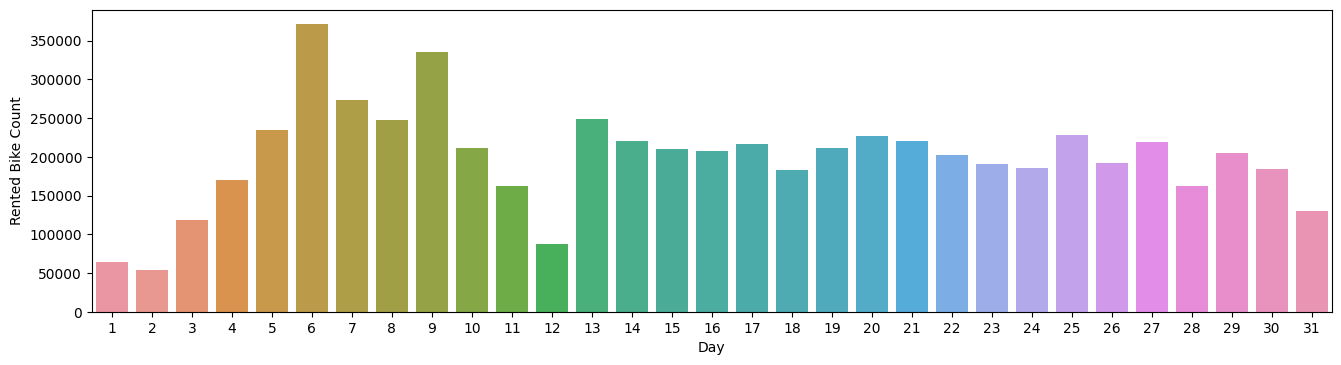

In [23]:
Day = df.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=100)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)

## ***Converting the categorical variables into numeric values using label encoding as the model understands only numeric values***

In [24]:
#label encoding using lambda function
df['Holiday']=df['Holiday'].apply(lambda x: 0 if x=='No Holiday' else 1)
df['Functioning Day']=df['Functioning Day'].apply(lambda x: 0 if x=='No' else 1)



In [25]:
#label encoding using sklearn library
from sklearn.preprocessing import LabelEncoder
newlabel=LabelEncoder()
df=df
df.Seasons=newlabel.fit_transform(df.Seasons)

In [26]:
df.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,254,2017,1,12
1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,204,2017,1,12
2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,173,2017,1,12
3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,107,2017,1,12
4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,78,2017,1,12


In [27]:
d=df['Date']
df.drop('Date',inplace=True,axis=1)
df.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count,Year,Month,Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,254,2017,1,12
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,204,2017,1,12
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,173,2017,1,12


In [28]:
#dropping variables
df.drop('Rented Bike Count',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Day',1,inplace=True)
df.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1


In [29]:
#applying StandardScalar 
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()

newdf=ss.fit_transform(df)


In [30]:
#After scaling the shape will change so creating dataframe 
newdf1=pd.DataFrame(newdf,columns=['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Seasons','Holiday','Functional Day'])

In [31]:
newdf1['Date']=d


In [32]:
#new dataframe after scaling and appending the dependent variable
newdf1['Rented Bike Count']=column
newdf1.head(3)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functional Day,Date,Rented Bike Count
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,254
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,204
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,1.0,0.0,1.0,2017-01-12,173


In [33]:
#using datetime library to convert date time variable to numeric values for processing
import datetime as dt
newdf1['Date'] = pd.to_datetime(newdf1['Date'])
newdf1['Date']=newdf1['Date'].map(dt.datetime.toordinal)

In [34]:
newdf1.head(10)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functional Day,Date,Rented Bike Count
0,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.000000,0.0,0.0,1.0,0.0,1.0,736341,254
1,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.000000,0.0,0.0,1.0,0.0,1.0,736341,204
2,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.000000,0.0,0.0,1.0,0.0,1.0,736341,173
3,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.000000,0.0,0.0,1.0,0.0,1.0,736341,107
4,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.000000,0.0,0.0,1.0,0.0,1.0,736341,78
5,0.217391,0.199301,0.377551,0.202703,1.000000,0.205882,0.000000,0.0,0.0,1.0,0.0,1.0,736341,100
6,0.260870,0.195804,0.357143,0.175676,1.000000,0.192042,0.000000,0.0,0.0,1.0,0.0,1.0,736341,181
7,0.304348,0.181818,0.387755,0.121622,1.000000,0.195502,0.000000,0.0,0.0,1.0,0.0,1.0,736341,460
8,0.347826,0.178322,0.377551,0.148649,1.000000,0.186851,0.002841,0.0,0.0,1.0,0.0,1.0,736341,930
9,0.391304,0.197552,0.275510,0.067568,0.963507,0.141869,0.065341,0.0,0.0,1.0,0.0,1.0,736341,490



# **Feature selection**

In [35]:
#feature selection based on the correlation
newdf1.drop(labels=['Humidity(%)','Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)


In [36]:
x=newdf1.iloc[:,:-1]
y=newdf1.iloc[:,-1:]

In [37]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=30)

# ***Linear Regression Model***

In [38]:
#building linear regression model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_prediction1 =  LR.predict(x_train)
y_prediction1



array([[1547.78815526],
       [ 716.55938386],
       [  64.44249843],
       ...,
       [ 384.58174025],
       [ 425.27352456],
       [1386.42321345]])

In [40]:
#predicting the test data
y_prediction =  LR.predict(x_test)
y_prediction

array([[ 429.90163219],
       [1444.25667312],
       [1148.64779413],
       ...,
       [ 713.63968955],
       [1384.50331179],
       [ 671.96148734]])

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# computing the r2 score,mean_squared_error,root_mean_squared error
score=r2_score(y_test,y_prediction)
print('r2 score of test data is',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score of test data is 0.5142064145873548
mean_sqrd_error is= 194461.6607050979
root_mean_squared error of is= 440.97807281666275


In [42]:
score1=r2_score(y_train,y_prediction1)
print('r2 score of train data is',score1)

r2 score of train data is 0.5358022937051423


## ***KNearestNeighbor Regression Model***

In [43]:
#building KNN regression model

from sklearn.neighbors import KNeighborsRegressor

kr=KNeighborsRegressor()
kr.fit(x_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
#predicting the test data
y_kpred=kr.predict(x_test)
y_kpred

array([[ 330.4],
       [1060. ],
       [1194.2],
       ...,
       [ 508. ],
       [ 664.8],
       [ 454. ]])

In [45]:
score=r2_score(y_test,y_kpred)
print('r2 socre is=',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_kpred))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_kpred)))

r2 socre is= 0.7010069656675173
mean_sqrd_error is= 119685.98133333333
root_mean_squared error of is= 345.9566177042048


## ***Random Forest Regression Model***

In [46]:
#building Random Forest Regression model

from sklearn.ensemble import RandomForestRegressor

rr=RandomForestRegressor()
rr.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
#predicting the test data
y_pred=rr.predict(x_test)
y_pred

array([ 286.01, 1321.74, 1171.32, ...,  361.6 ,  658.77,  244.09])

In [48]:
score=r2_score(y_test,y_pred)
print('r2 socre is=',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is= 0.8366022911697526
mean_sqrd_error is= 65407.59443652969
root_mean_squared error of is= 255.74908491826454


# **Summary**
## -There were no null values in the dataset.
## -The probability of renting bike is more in the evening.
## -Summer season has the highest bike renting.
## -The bikes are been rented on non holidays than onn holidays.
## -The bikes are rented only on functioning days.
## -The bike count is very good between May and August and also sudden hike in the month of October.
## -1st weekend has a peak in rented bike count and pretty stable after.
## -There is linear growth in renting bikes over years.
## -Three machine learning models are built:
## 1)Linear Regression- r2_score=0.5142
## 2)KNearest Neighbor Regressor-r2_score=0.7010.
## 3)Random Forest Regressor-r2_score=0.8411.

## -Hence Random Forest Regressor model performs well over the dataset.
